# Importing Libraries

In [392]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# 1. 
Exploring the data

## (i)
How many rows are in this data set? How many columns?<br>
What do the rows and columns represent?

In [361]:
ccpp_df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9658 rows x 5 columns in Combined Cycle Power Plant Data Set.\
The column 'AT' reresents: hourly average ambient variables Temperature.\
The column 'V' represents: Exhaust Vacuum.\
The column 'AP' reresents: Ambient Pressure.\
The column 'RH' represents: Relative Humidity.\
The column 'PE' reresents: Net hourly electrical energy output.\
First four columns are the predictors and the last columnn is dependent variable, which is target to predict by predictors.\
The rows represent index of the rows.

## (ii)
Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable.<br>
Describe your findings.

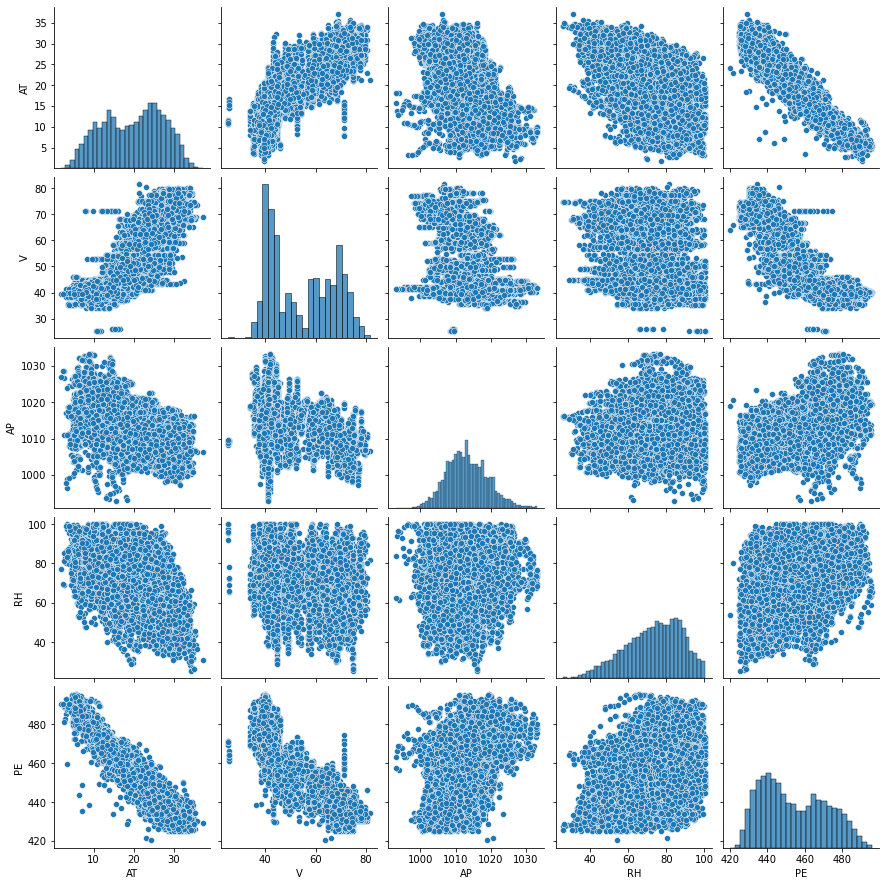

In [362]:
sns.pairplot(ccpp_df)

It is possible to say that independent variables 'AT' and 'V' are showing the linear relation pattern with dependent variable 'PE'.\
The scatterplots of other predictors('AP', 'RH') and 'PE' seem to be randomly distributed, which are hard to find out the relationships.\
The scatterplot of 'AT' and 'V' also seems like to be they are related.

## (iii)
What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset?<br>
Summarize them in a table.

In [363]:
stats = ccpp_df.describe()
stats.loc['range'] = stats.loc['max']-stats.loc['min']
stats.loc['IQR'] = stats.loc['75%']-stats.loc['25%']
stats=stats.drop(['count','std','min','max'])\
            .rename(index={'25%': 'first_quartile', '75%': 'third_quartile', '50%': 'median'})\
            .reindex(['mean', 'median', 'range', 'first_quartile', 'third_quartile', 'IQR'])
stats

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
first_quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third_quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


# 2. 
For each predictor, fit a sample linear regression model to predict the response.<br>
Describe your results. <br>
In which of the models is there a statistically significant association between the predictor and the response?<br>
Create some plots to back up your assertions.<br>
Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [364]:
# Linear regression model for AT and PE.
x,y=sm.add_constant(ccpp_df.AT),ccpp_df.PE
md = sm.OLS(y,x,hasconst=True).fit()
y_AT = md.predict(x)
at_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:05   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [365]:
# Linear regression model for V and PE.
x,y=sm.add_constant(ccpp_df.V),ccpp_df.PE
md = sm.OLS(y,x,hasconst=True).fit()
y_V = md.predict(x)
v_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:06   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [366]:
# Linear regression model for AP and PE.
x,y=sm.add_constant(ccpp_df.AP),ccpp_df.PE
md = sm.OLS(y,x,hasconst=True).fit()
y_AP = md.predict(x)
ap_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:06   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [367]:
# Linear regression model for RH and PE.
x,y=sm.add_constant(ccpp_df.RH),ccpp_df.PE
md = sm.OLS(y,x,hasconst=True).fit()
y_RH = md.predict(x)
rh_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:06   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

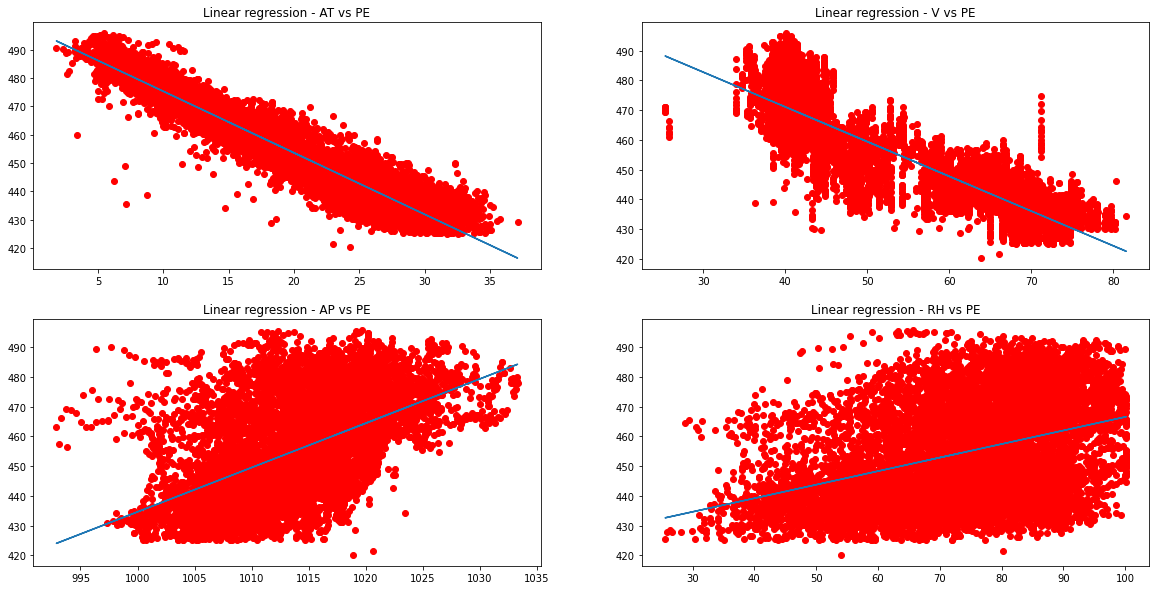

In [368]:
# Plot the linear regression model for each of predictors.
fig, axs = plt.subplots(ncols=2,nrows=2, figsize = (20,10))
axs[0,0].set_title('Linear regression - AT vs PE')
axs[0,0].scatter(ccpp_df.AT,ccpp_df.PE,c='red')
axs[0,0].plot(ccpp_df.AT,y_AT)
axs[0,1].set_title('Linear regression - V vs PE')
axs[0,1].scatter(ccpp_df.V,ccpp_df.PE,c='red')
axs[0,1].plot(ccpp_df.V,y_V)
axs[1,0].set_title('Linear regression - AP vs PE')
axs[1,0].scatter(ccpp_df.AP,ccpp_df.PE, c='red')
axs[1,0].plot(ccpp_df.AP,y_AP)
axs[1,1].set_title('Linear regression - RH vs PE')
axs[1,1].scatter(ccpp_df.RH,ccpp_df.PE, c='red')
axs[1,1].plot(ccpp_df.RH,y_RH)

All of the predictor's p-values are mostly near to 0.0000.<br>
Therefore, We can reject the null hypothesis for all results.<br>
The results of R-squared value for each predictors are as follow:<br>
AT: 0.899<br>
V: 0.757<br>
AP: 0.269<br>
RH: 0.152<br>
Therefore, predictor 'AT' is the most fitted predictor to regression line.<br>
Also, It is desirable to say that all the associations between each predictor and the response are statistically significant, since they have a low p-value.<br>
However, statisical significance does not imply practical significance, in this case, it is highly easy to reject the null hypothesis; therefore, I am not sure that p-values here are pragmatic.<br>
From my observation, there are no outliers which affect the regression model, every data is distributed in compacted range.

# 3.
Fit a multiple regression model to predict the response using all of the predictors. <br>
Describe your results. <br>
For which predictors can we reject the null hypothesis H0 :βj =0?

In [369]:
# Multiple regression model - all predictors vs dependent variable.
x,y=sm.add_constant(ccpp_df[['AT','V','AP','RH']]),ccpp_df.PE
md = sm.OLS(y,x,hasconst=True).fit()
y_AT = md.predict(x)
multi_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:06   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We cannot reject the null hypothesis for every predictors, since every predictors have low p-value. (Nearly zero)

# 4.
How do your results from 1c compare to your results from 1d? <br>
Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. <br>
That is, each predictor is displayed as a single point in the plot. <br>
Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

(-2.5, 2.5)

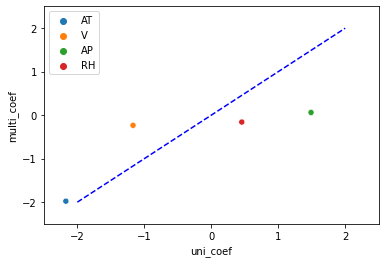

In [370]:
# Plot the Univirate regression coefficients vs Multiple regression coefficients.
uni_params = [at_param[1],v_param[1],ap_param[1],rh_param[1]]
multi_params = multi_param[1:]
label = ['AT','V','AP','RH']
coef = pd.DataFrame({'uni_coef': uni_params, 'multi_coef': multi_params})
sns.scatterplot(x='uni_coef', y='multi_coef', data = coef, hue = coef.index)
plt.plot([-2,2],[-2,2],color='blue', linestyle='dashed') #plot the y=x line.
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

In [371]:
# Regression coefficients for each predictors
print(coef)

    uni_coef  multi_coef
AT -2.171320   -1.977513
V  -1.168135   -0.233916
AP  1.489872    0.062083
RH  0.455650   -0.158054


P-values for every predictors are mostly zero in both Univariate regression and Multople regression.<br>
There is significant difference in regression coefficient between Univariate regression and Multople regression.<br>
For the 'RH' predictor, it has positive regression coefficient in Univariate regression; however, it has negative regression coefficient in Multiple regression.

# 5.
Is there evidence of nonlinear association between any of the predictors and the response? <br>
To answer this question, for each predictor X, fit a model of the form Y =β0 +β1X+β2X2 +β3X3 +ε.

In [372]:
# Polynomial regression model - AT vs PE
x,y=sm.add_constant(ccpp_df.AT),ccpp_df.PE
x['AT^2'] = x.AT**2
x['AT^3'] = x.AT**3
md = sm.OLS(y,x,hasconst=True).fit()
y_AT = md.predict(x)
at_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [373]:
# Polynomial regression model - V vs PE
x,y=sm.add_constant(ccpp_df.V),ccpp_df.PE
x['V^2'] = x.V**2
x['V^3'] = x.V**3
md = sm.OLS(y,x,hasconst=True).fit()
y_V = md.predict(x)
at_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [374]:
# Polynomial regression model - AP vs PE
x,y=sm.add_constant(ccpp_df.AP),ccpp_df.PE
x['AP^2'] = x.AP**2
x['AP3'] = x.AP**3
md = sm.OLS(y,x,hasconst=True).fit()
y_AP = md.predict(x)
at_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [375]:
# Polynomial regression model - RH vs PE
x,y=sm.add_constant(ccpp_df.RH),ccpp_df.PE
x['RH^2'] = x.RH**2
x['RH^3'] = x.RH**3
md = sm.OLS(y,x,hasconst=True).fit()
y_RH = md.predict(x)
at_param = md.params
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

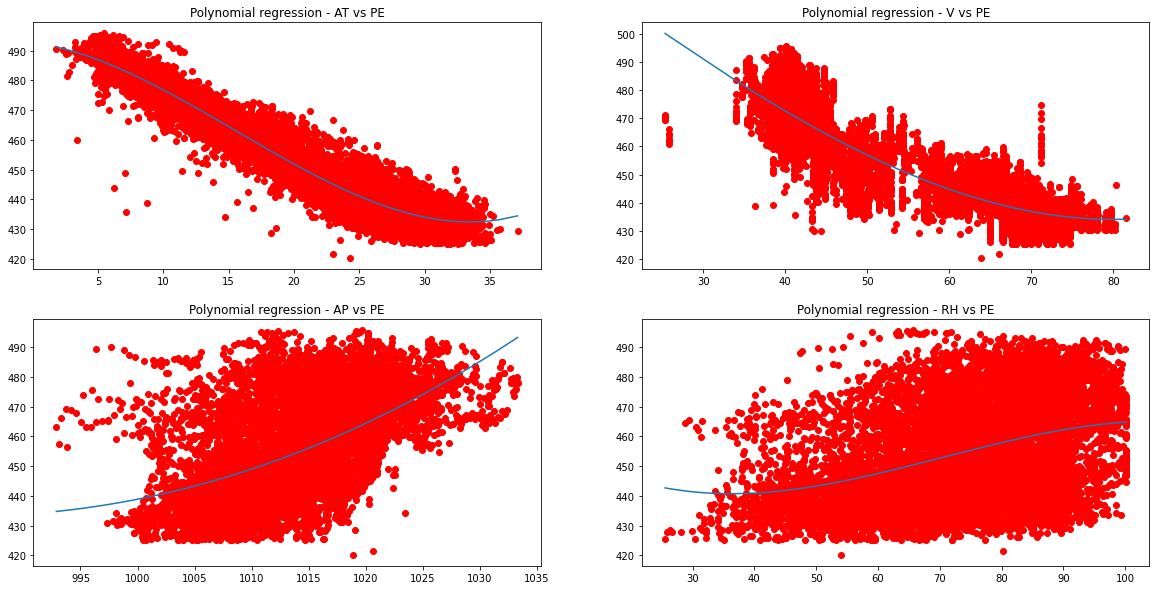

In [376]:
# Plot the polynomial regression model for each of predictors.
fig, axs = plt.subplots(ncols=2,nrows=2, figsize = (20,10))
axs[0,0].set_title('Polynomial regression - AT vs PE')
axs[0,0].scatter(ccpp_df.AT,ccpp_df.PE,c='red')
df_at=pd.DataFrame({'x':ccpp_df.AT,'y':y_AT}).sort_values(by=['x'])
axs[0,0].plot(df_at.x,df_at.y)
axs[0,1].set_title('Polynomial regression - V vs PE')
axs[0,1].scatter(ccpp_df.V,ccpp_df.PE,c='red')
df_v=pd.DataFrame({'x':ccpp_df.V,'y':y_V}).sort_values(by=['x'])
axs[0,1].plot(df_v.x,df_v.y)
axs[1,0].set_title('Polynomial regression - AP vs PE')
axs[1,0].scatter(ccpp_df.AP,ccpp_df.PE, c='red')
df_ap=pd.DataFrame({'x':ccpp_df.AP,'y':y_AP}).sort_values(by=['x'])
axs[1,0].plot(df_ap.x,df_ap.y)
axs[1,1].set_title('Polynomial regression - RH vs PE')
axs[1,1].scatter(ccpp_df.RH,ccpp_df.PE, c='red')
df_rh=pd.DataFrame({'x':ccpp_df.RH,'y':y_RH}).sort_values(by=['x'])
axs[1,1].plot(df_rh.x,df_rh.y)

The result of the polynomial regression between predictor 'V' and 'PE' come up with p-value with 0.768 for V^2 and 0.014 for V^3.<br>
Therefore, the result from 'V' vs 'PE' are statistically non-significant.<br>
For other results, there is no evidence of non-linear association between predictors('AT', 'AP', 'RH') and dependent variable.<br>
This evidence is highly subjective because it is assumed by personal observation of scatter plot and regression model.


# 6.
Is there evidence of association of interactions of predictors with the response? <br>
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [377]:
# Linear regression with interactions
x,y=sm.add_constant(ccpp_df[['AT','V','AP','RH']]),ccpp_df.PE
x['AT*V'] = x.AT*x.V
x['AT*AP'] = x.AT*x.AP
x['AT*RH'] = x.AT*x.RH
x['V*AP'] = x.V*x.AP
x['V*RH'] = x.V*x.RH
x['AP*RH'] = x.AP*x.RH
md = sm.OLS(y,x,hasconst=True).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Since interaction terms of 'AT'-'AP' and 'V'-'RH' show p-values greater than 0.05, these interaction terms are statistically non-significant.<br>
Other interaction terms seem to be statistically significant.


# 7.
Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? <br>
Train the regression model on a randomly selected 70% subset of the data with all predictors. <br>
Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). <br>
Test both models on the remaining points and report your train and test MSEs.

In [378]:
#Train and test the regression model - data with all predictors
x,y=sm.add_constant(ccpp_df[['AT','V','AP','RH']]),ccpp_df.PE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
md = sm.OLS(y_train,x_train,hasconst=True).fit()
predict_a = md.predict(x_test)
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        458.3988     11.562     39.649      0.0

All the variables are statistically significant.<br>
Therefore, no need to remove variables.<br>

In [379]:
print(f'Mean Squared Error of train and test set is {mean_squared_error(y_test, predict_a)}')

Mean Squared Error of train and test set is 20.777478106884356


In [380]:
#Train and test the regression model - model involving all possible interaction terms and quadratic nonlinearities
x,y=sm.add_constant(ccpp_df[['AT','V','AP','RH']]),ccpp_df.PE
x['AT^2'] = x.AT**2
x['V^2'] = x.V**2
x['AP^2'] = x.AP**2
x['RH^2'] = x.RH**2
x['AT*V'] = x.AT*x.V
x['AT*AP'] = x.AT*x.AP
x['AT*RH'] = x.AT*x.RH
x['V*AP'] = x.V*x.AP
x['V*RH'] = x.V*x.RH
x['AP*RH'] = x.AP*x.RH
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
md = sm.OLS(y_train,x_train,hasconst=True).fit()
print(md.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7181.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8171.8080   1416.708     -5.768      0.0

Variable 'AT-AP' come up with the highest p-value.<br>
Variable with the largest p-value will be removed, removing 'AT-AP' and fit the model again.

In [381]:
x_train = x_train.drop('AT*AP', axis=1)
x_test = x_test.drop('AT*AP', axis=1)
md = sm.OLS(y_train,x_train,hasconst=True).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7735.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6683   BIC:                         3.851e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8407.6645   1239.629     -6.782      0.0

Variable 'V-RH' come up with the highest p-value.<br>
Variable with the largest p-value will be removed, removing 'V-RH' and fit the model again.

In [382]:
x_train = x_train.drop('V*RH', axis=1)
x_test = x_test.drop('V*RH', axis=1)
md = sm.OLS(y_train,x_train,hasconst=True).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8380.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6684   BIC:                         3.850e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8455.2645   1237.872     -6.830      0.0

Variable 'V^2' come up with the highest p-value.<br>
Variable with the largest p-value will be removed, removing 'V^2' and fit the model again.

In [383]:
x_train = x_train.drop('V^2', axis=1)
x_test = x_test.drop('V^2', axis=1)
md = sm.OLS(y_train,x_train,hasconst=True).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9142.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:10:07   Log-Likelihood:                -19193.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6685   BIC:                         3.849e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8533.1836   1234.561     -6.912      0.0

All variables are statistically significant now, no need to remove variable anymore.

In [384]:
predict_b = md.predict(x_test)
print(f'Mean Squared Error of train and test set is {mean_squared_error(y_test, predict_b)}')

Mean Squared Error of train and test set is 18.232225767316166


The model involving all possible interaction terms and quadratic nonlinearities has smaller MSE than the model including all predictors!

# 8.
KNN Regression<br>
Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit.<br>
Plot the train and test errors in terms of 1/k.

In [385]:
# KNN regression - using raw features
x,y=ccpp_df[['AT','V','AP','RH']],ccpp_df.PE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
errors_rf = pd.DataFrame(columns=['k','1/k','train_error','test_error'])

for k in range(1,101):
    md = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    train_predict = md.predict(x_train)
    test_predict = md.predict(x_test)
    train_error = mean_squared_error(y_train, train_predict)
    test_error = mean_squared_error(y_test, test_predict)
    errors_rf = errors_rf.append({'k':k, '1/k':1/k, 'train_error':train_error, 'test_error':test_error}, ignore_index=True)
errors_rf

,k,1/k,train_error,test_error
0,1.0,1.000000,0.000000,19.837862
1,2.0,0.500000,5.638429,16.998113
2,3.0,0.333333,8.191450,16.273116
3,4.0,0.250000,9.607380,15.834033
4,5.0,0.200000,10.552961,15.704821
...,...,...,...,...
95,96.0,0.010417,21.871561,22.330317
96,97.0,0.010309,21.909692,22.376543
97,98.0,0.010204,21.968911,22.418698
98,99.0,0.010101,22.026650,22.440599


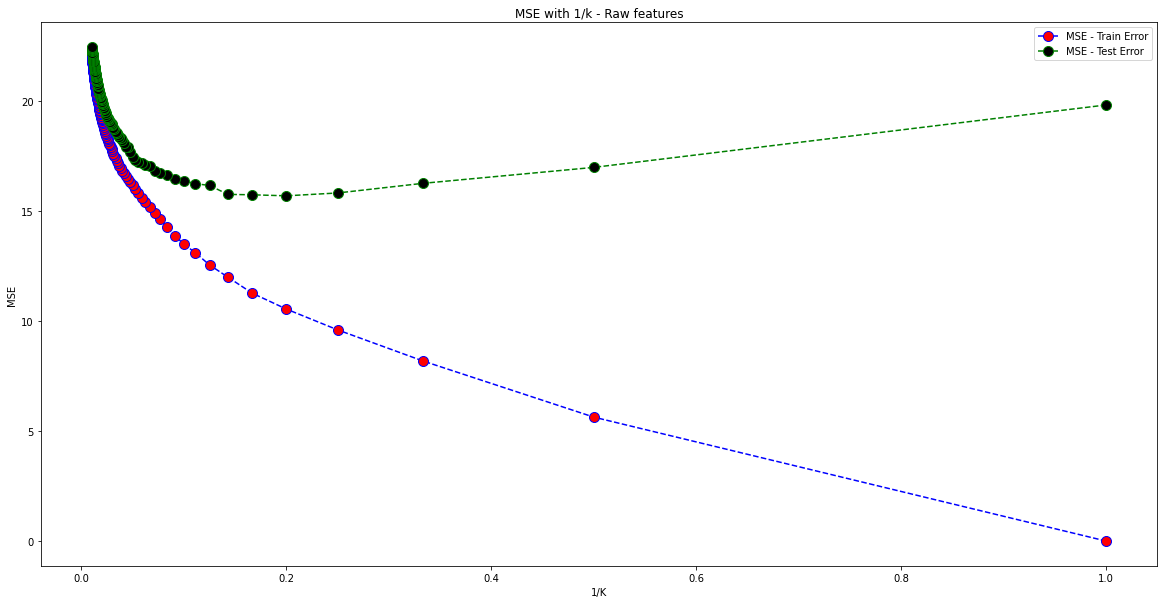

In [386]:
plt.figure(figsize=(20,10))
plt.plot(1/errors_rf.k, errors_rf.train_error, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label='MSE - Train Error')
plt.plot(1/errors_rf.k, errors_rf.test_error, color='green', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10, label='MSE - Test Error')
plt.legend()
plt.xlabel("1/K")
plt.ylabel("MSE")
plt.title("MSE with 1/k - Raw features")
plt.show()

In [387]:
print('KNN regression - Raw features')
print(f"The smallest test error is {errors_rf['test_error'].min()} when k is {errors_rf['k'][errors_rf['test_error'].idxmin]}")

KNN regression - Raw features
The smallest test error is 15.704821203761764 when k is 5.0


In [388]:
# KNN regression - using normailized features
x,y=ccpp_df[['AT','V','AP','RH']],ccpp_df.PE
scaler = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
errors_nf = pd.DataFrame(columns=['k','1/k','train_error','test_error'])

for k in range(1,101):
    md = KNeighborsRegressor(n_neighbors=k).fit(x_train_scaled,y_train)
    train_predict = md.predict(x_train_scaled)
    test_predict = md.predict(x_test_scaled)
    train_error = mean_squared_error(y_train, train_predict)
    test_error = mean_squared_error(y_test, test_predict)
    errors_nf = errors_nf.append({'k':k, '1/k':1/k, 'train_error':train_error, 'test_error':test_error}, ignore_index=True)
errors_nf

,k,1/k,train_error,test_error
0,1.0,1.000000,0.000000,21.434981
1,2.0,0.500000,5.390675,16.911147
2,3.0,0.333333,7.302648,15.895972
3,4.0,0.250000,8.683366,15.241226
4,5.0,0.200000,9.574933,15.068678
...,...,...,...,...
95,96.0,0.010417,18.534970,19.325237
96,97.0,0.010309,18.558081,19.350577
97,98.0,0.010204,18.582643,19.366229
98,99.0,0.010101,18.593426,19.395206


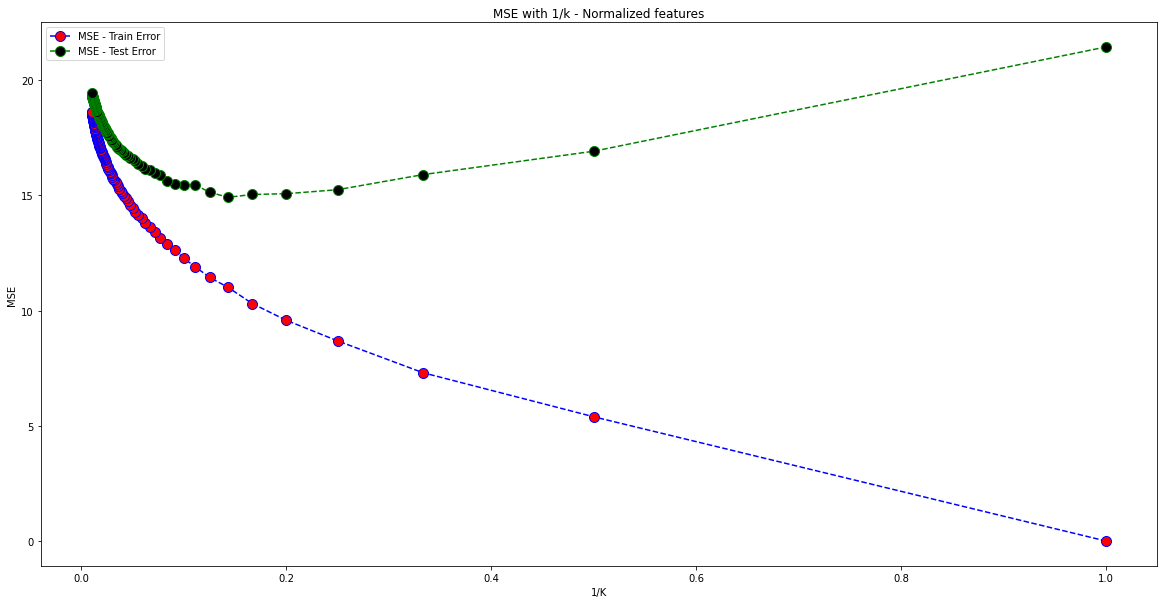

In [389]:
plt.figure(figsize=(20,10))
plt.plot(1/errors_rf.k, errors_nf.train_error, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label='MSE - Train Error')
plt.plot(1/errors_rf.k, errors_nf.test_error, color='green', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10, label='MSE - Test Error')
plt.legend()
plt.xlabel("1/K")
plt.ylabel("MSE")
plt.title("MSE with 1/k - Normalized features")
plt.show()

In [390]:
print('KNN regression - Normalized features')
print(f"The smallest test error is {errors_nf['test_error'].min()} when k is {errors_nf['k'][errors_nf['test_error'].idxmin]}")

KNN regression - Normalized features
The smallest test error is 14.910644795598495 when k is 7.0


# 9.
Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

The smallest test error that I could get from KNN regression model was 14.91 from model with normalized features.<br>
Also, the smallest test error that i could get from linear regression model was 18.23 from model involving all possible interaction terms and quadratic nonlinearities.<br>
Therefore, it is possible to say that the KNN regression model works better for this dataset. <br>
For Linear regression, the model includes strong assumption of linear relationship between predictors and dependant variable which makes more error here.<br>
However, KNN regression is a non-parametic model which provides more flexible model; therefore, in this dataset, it works better.

# 10.
ISLR 2.4.1<br>
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. <br>
Justify your answer.

## (a)
The sample size n is extremely large, and the number of predictors p is small.

A flexible learning method would be result in better performance than inflexible method, since the sample size is extremely large.<br>
It is highly intuitive that inflexible method will perform worse with extremely large sample sized data.

## (b)
The number of predictors p is extremely large, and the number of observations n is small.

A inflexible learning method would be better in this case, since there is a possibility of over-fitting with a flexible learning method due to the small number of observation.

## (c)
The relationship between the predictors and response is highly non-linear.

It is prefferable to use a flexible learning method, since inflexible learning method sometime does not perform well in highly non-linear relationship.

## (d)
The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

A flexible learning method is not prefferable in this case, since it will cause the over-fitting. <br>
Overfitted-model will cause the bad performance of prediction.

# 11.
The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.<br>
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

## (a)
Compute the Euclidean distance between each observation and the testpoint,X1 =X2 =X3 =0.

In [397]:
obss = [np.array((0,3,0)),np.array((2,0,0)),np.array((0,1,3)),np.array((0,1,2)),np.array((-1,0,1)),np.array((1,1,1))]
a = np.array((0,0,0))
k=1
for n in obss:
    print(f'Euclidean distance between observation {k} and the test point is {np.linalg.norm(n-a)}')
    k += 1

Euclidean distance between observation 1 and the test point is 3.0
Euclidean distance between observation 2 and the test point is 2.0
Euclidean distance between observation 3 and the test point is 3.1622776601683795
Euclidean distance between observation 4 and the test point is 2.23606797749979
Euclidean distance between observation 5 and the test point is 1.4142135623730951
Euclidean distance between observation 6 and the test point is 1.7320508075688772


## (b)
What is our prediction with K = 1? Why?


The nearest neighbor of the test point is observation 5; therefore, the prediction result is 'Green'.

## (c)
What is our prediction with K = 3? Why?

The three nearest neighbor of the test point are observation 2, 5, and 6. <br>
Y values of each neighbor are Red, Green, Red. <br>
More 'red' in the result; therefore, the prediction result is 'Red'.

## (d)
If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

The best value for K would be smaller, since the large value of K would not be able to fit the model of nonlinear boundary.